In [16]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [17]:
file_name = "./data-cancer-numerical.csv"
df = pd.read_csv(file_name,delimiter=",")

df.head()


# remove Id collumn :
df = df.drop(['id'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
# remove NaaN data
df.isnull().sum()
df.isna().sum()

df = df.dropna(axis=1)


In [5]:
feature_data = df[
    [
        'radius_mean','texture_mean','area_mean','smoothness_mean',
        'compactness_mean','concavity_mean','concave points_mean',
        'symmetry_mean','fractal_dimension_mean',
        'radius_se','texture_se','area_se','smoothness_se',
        'compactness_se','concavity_se','concave points_se',
        'symmetry_se','fractal_dimension_se',
        'radius_worst','texture_worst','area_worst','smoothness_worst',
        'compactness_worst','concavity_worst','concave points_worst',
        'symmetry_worst','fractal_dimension_worst',
        
    ]
]

X = np.asarray(feature_data)
X[0:5]

array([[1.799e+01, 1.038e+01, 1.001e+03, 1.184e-01, 2.776e-01, 3.001e-01,
        1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01, 1.534e+02,
        6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02, 3.003e-02, 6.193e-03,
        2.538e+01, 1.733e+01, 2.019e+03, 1.622e-01, 6.656e-01, 7.119e-01,
        2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.326e+03, 8.474e-02, 7.864e-02, 8.690e-02,
        7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01, 7.408e+01,
        5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02, 1.389e-02, 3.532e-03,
        2.499e+01, 2.341e+01, 1.956e+03, 1.238e-01, 1.866e-01, 2.416e-01,
        1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.203e+03, 1.096e-01, 1.599e-01, 1.974e-01,
        1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01, 9.403e+01,
        6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02, 2.250e-02, 4.571e-03,
        2.357e+01, 2.553e+01, 1.709e+03, 1.444e-01, 4.245e-01, 4.504e-01,
        2.430e-01, 3.613e-01

In [6]:
y = np.asarray(df['diagnosis'])
# le_diagnosis = preprocessing.LabelEncoder()
# le_diagnosis.fit(['B','M'])
# y = le_diagnosis.transform(y)

y[0:5]

array([1, 1, 1, 1, 1])

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 27) (455,)
Test set: (114, 27) (114,)


In [8]:
class Bayes:
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.n_classes = len(np.unique(y))

        self.mean = np.zeros((self.n_classes, self.n_features))
        self.variance = np.zeros((self.n_classes, self.n_features))
        self.priors = np.zeros(self.n_classes)

        for c in range(self.n_classes):
            X_c = X[y == c]

            self.mean[c, :] = np.mean(X_c, axis=0)
            self.variance[c, :] = np.var(X_c, axis=0)
            self.priors[c] = X_c.shape[0] / self.n_samples

    def predict(self, X):
        y_hat = [self.get_class_probability(x) for x in X]
        return np.array(y_hat)

    def get_class_probability(self, x):
        posteriors = list()

        for c in range(self.n_classes):
            mean = self.mean[c]
            variance = self.variance[c]
            prior = np.log(self.priors[c])

            posterior = np.sum(np.log(self.gaussian_density(x, mean, variance)))
            posterior = prior + posterior
            posteriors.append(posterior)

        return np.argmax(posteriors)

    def gaussian_density(self, x, mean, var):
        const = 1 / np.sqrt(var * 2 * np.pi)
        proba = np.exp(-0.5 * ((x - mean) ** 2 / var))

        return const * proba


In [9]:
#to check how much did algo predict right
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
    return (correct/len(y_tes))*100

In [10]:
nb = Bayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print('Naive Bayes Accuracy: ', accuracy(y_test, predictions))

Naive Bayes Accuracy:  92.10526315789474


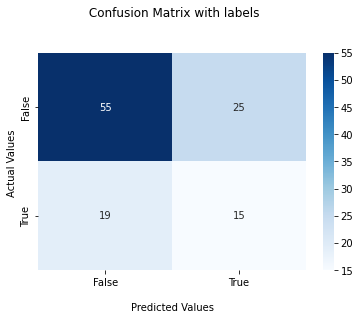

In [34]:
cf_matrix = confusion_matrix(y_test, y_train[0:114], )

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [20]:
feature_data = df[
    [
        'radius_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'radius_se',
        'smoothness_se',
        'concavity_se',
        'concave points_se',
        'radius_worst',
        'texture_worst',
        'area_worst',
        'concavity_worst',
        'symmetry_worst',
        'fractal_dimension_worst'
    ]
]

X = np.asarray(feature_data)
X[0:5]

array([[1.799e+01, 2.776e-01, 3.001e-01, 1.471e-01, 1.095e+00, 6.399e-03,
        5.373e-02, 1.587e-02, 2.538e+01, 1.733e+01, 2.019e+03, 7.119e-01,
        4.601e-01, 1.189e-01],
       [2.057e+01, 7.864e-02, 8.690e-02, 7.017e-02, 5.435e-01, 5.225e-03,
        1.860e-02, 1.340e-02, 2.499e+01, 2.341e+01, 1.956e+03, 2.416e-01,
        2.750e-01, 8.902e-02],
       [1.969e+01, 1.599e-01, 1.974e-01, 1.279e-01, 7.456e-01, 6.150e-03,
        3.832e-02, 2.058e-02, 2.357e+01, 2.553e+01, 1.709e+03, 4.504e-01,
        3.613e-01, 8.758e-02],
       [1.142e+01, 2.839e-01, 2.414e-01, 1.052e-01, 4.956e-01, 9.110e-03,
        5.661e-02, 1.867e-02, 1.491e+01, 2.650e+01, 5.677e+02, 6.869e-01,
        6.638e-01, 1.730e-01],
       [2.029e+01, 1.328e-01, 1.980e-01, 1.043e-01, 7.572e-01, 1.149e-02,
        5.688e-02, 1.885e-02, 2.254e+01, 1.667e+01, 1.575e+03, 4.000e-01,
        2.364e-01, 7.678e-02]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (455, 14) (455,)
Test set: (114, 14) (114,)


In [22]:
nb = Bayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print('Naive Bayes Accuracy: ', accuracy(y_test, predictions))

Naive Bayes Accuracy:  91.22807017543859


In [25]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
nb = Bayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

print('Naive Bayes Accuracy: ', accuracy(y_test, predictions))

Naive Bayes Accuracy:  91.22807017543859
